In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
test = load_iris()

In [4]:
dir(test)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df = pd.DataFrame(test.data, columns=test.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
df.columns = ['length','width']

In [8]:
df.head()

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


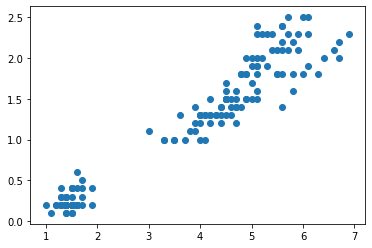

In [9]:
plt.scatter(df.length,df.width)

In [10]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['length','width']])

In [11]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [12]:
df['cluster'] = y_predict

In [15]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

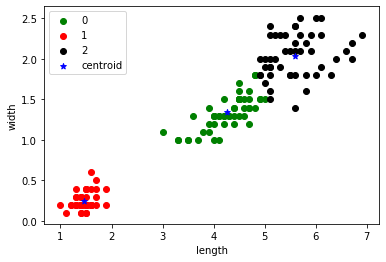

In [20]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['length'],df0['width'], color='green', label='0')
plt.scatter(df1['length'],df1['width'], color='red', label='1')
plt.scatter(df2['length'],df2['width'], color='black', label='2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid',alpha=1)

plt.xlabel('length')
plt.ylabel('width')
plt.legend()

In [23]:
k_rng = range(1,10)
error = []
for k in k_rng:
    cl = KMeans(n_clusters=k)
    cl.fit_predict(df[['length','width']])
    error.append(cl.inertia_)

In [24]:
error

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.477123363965468,
 13.916908757908757,
 11.088890437134374,
 9.197417958598738,
 7.721351966873707,
 6.480259206692711]

Text(0, 0.5, 'Sum of errors')

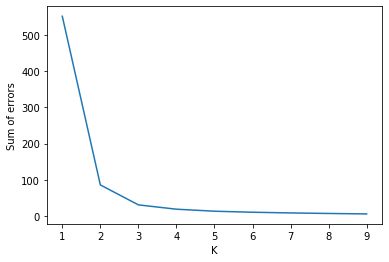

In [25]:
plt.plot(k_rng,error)
plt.xlabel('K')
plt.ylabel('Sum of errors')